In [175]:
import pandas as p
import numpy as np
import matplotlib.pyplot as mp
import scipy.optimize as opt
from scipy.io import loadmat

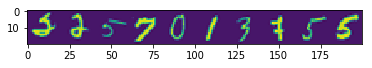

In [176]:
#Data access
data = loadmat('ex3data1.mat')

y = data['y']
x = data['X']
y = np.matrix(y)
x = np.matrix(x)
y_T = y.T.ravel()
x_T = x.T


theta = np.zeros(x.shape[1])
m = x.shape[0]

#Select random images and plot
sample = np.random.choice(x.shape[0],10)
mp.imshow(x[sample, :].reshape(-1,20).T)

In [177]:
#Sigmoid function
sigmoid_function = lambda a : 1 / (1 + np.vectorize(np.exp)(-a))

#Gradient function
def gradient(theta,x_T,y_T,m):
    gradient = 1/m * x_T @ (sigmoid_function(theta @ x_T).T - y_T)
    return (np.asarray(gradient).ravel())

#Cost function
def cost_function(theta,x_T,y_T,m):
    cost = -1/m * ((np.log(sigmoid_function(theta @ x_T)) @ y_T) + (np.log(1 - sigmoid_function(theta @ x_T)) @ (1 - y_T)))
    return (np.asarray(cost).ravel()[0])

In [178]:
#def oneVsAll(X,y,num_etiquetas,reg):
    #Array de shape y por 10 de valores del 0 al 9

labels = (np.ones((np.shape(y)[0],10)) * np.array(y))
r = range(1,11)
labels = labels == r
labels = labels * 1
labels = np.matrix(labels)

theta_opt = np.empty([np.shape(x)[1],10])

for i in range(0,9):
    theta_opt[:,i] = opt.fmin_tnc(func=cost_function,x0=theta,fprime=gradient,args=(x_T,labels[:,i],m))[0]

  

/home/jaime/Documents/pyenv/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


KeyboardInterrupt: 

In [179]:
theta_opt = np.matrix(theta_opt)
sigmoid_results = sigmoid_function(theta_opt.T @ x_T).T >= 0.5
print(sigmoid_results.T)
#comparition_array = sigmoid_results == y

#valid_classes = np.shape(comparition_array[comparition_array == True])[1]
#accuracy = valid_classes / np.shape(comparition_array)[1]
#print(accuracy)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [209]:
#NEURAL NETWORKS

#Data access
data = loadmat('ex3data1.mat')

y = data['y']
x = data['X']
y = np.matrix(y)
x = np.matrix(x)
y_T = y.T.ravel()
x_T = x.T

#Sigmoid function
sigmoid_function = lambda a : 1 / (1 + np.vectorize(np.exp)(-a))

#Load all the data and custom weights for the neural network
weights = loadmat('ex3weights.mat')
weights = weights['Theta1'],weights['Theta2']
weights = np.matrix(weights)

x = np.hstack((np.ones((np.shape(x)[0],1)),x))
x_T = x.T

def forward_propagation(activation, weights, i, layers):
    if i == (layers - 2):
        return np.argmax(sigmoid_function(weights[0,i] @ activation)) + 1
    
    if i == -1:
        return forward_propagation(activation,weights,i+1,layers)
    else:
        sigmoid = sigmoid_function(weights[0,i] @ activation)
        activation = np.vstack((1,sigmoid))
        return forward_propagation(activation, weights, i+1, layers)
#for loop?  
forward_propagation(x_T[:,0], weights, -1, 3)   

10